In [180]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [181]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3 

In [182]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [183]:
class_names=dataset.class_names

In [184]:
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [185]:
len(dataset)

68

In [186]:
68*32


2176

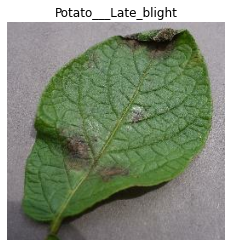

In [187]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[label_batch[0]])
    #plt.figure(figsize=( ))

In [188]:
#80% training
#10% validation 10% test 

In [189]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [190]:
train_ds=dataset.take(54)
len(train_ds)

54

In [191]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [192]:
len(dataset)*0.1

6.800000000000001

In [193]:
val_ds=test_ds.take(6)
test_ds=test_ds.skip(6)

In [194]:
def get_dataset_partitions_tf(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [195]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [196]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#data is now optimized so that my training will run fast

In [197]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [198]:
#now we will do data augmentation


In [199]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [200]:
## now we will make a convolutional neural networks and then we will train it

In [201]:
n_classes=3
#BATCH_SIZE=32
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)


model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes, activation="softmax")

]) 
model.build(input_shape=input_shape)

In [202]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_23 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 sequential_24 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 conv2d_60 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                

In [203]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=["accuracy"])

In [204]:
history=model.fit(
train_ds,
batch_size=BATCH_SIZE,
validation_data=val_ds,
verbose=1,
epochs=50)

Epoch 1/50
54/54 [==============================] - 90s 2s/step - loss: 0.9041 - accuracy: 0.5093 - val_loss: 0.9322 - val_accuracy: 0.4583
Epoch 2/50
54/54 [==============================] - 79s 1s/step - loss: 0.6862 - accuracy: 0.6800 - val_loss: 0.6060 - val_accuracy: 0.7292
Epoch 3/50
54/54 [==============================] - 80s 1s/step - loss: 0.4898 - accuracy: 0.7812 - val_loss: 0.4526 - val_accuracy: 0.8021
Epoch 4/50
54/54 [==============================] - 80s 1s/step - loss: 0.3525 - accuracy: 0.8565 - val_loss: 0.3718 - val_accuracy: 0.8385
Epoch 5/50
54/54 [==============================] - 84s 2s/step - loss: 0.2498 - accuracy: 0.9010 - val_loss: 0.4324 - val_accuracy: 0.8177
Epoch 6/50
54/54 [==============================] - 85s 2s/step - loss: 0.2462 - accuracy: 0.9068 - val_loss: 0.2802 - val_accuracy: 0.8906
Epoch 7/50
54/54 [==============================] - 82s 2s/step - loss: 0.2334 - accuracy: 0.9126 - val_loss: 0.3039 - val_accuracy: 0.8906
Epoch 8/50
54/54 [==

Epoch 42/50
54/54 [==============================] - 97s 2s/step - loss: 0.0385 - accuracy: 0.9855 - val_loss: 0.2759 - val_accuracy: 0.9219
Epoch 43/50
54/54 [==============================] - 93s 2s/step - loss: 0.0501 - accuracy: 0.9809 - val_loss: 0.3870 - val_accuracy: 0.9167
Epoch 44/50
54/54 [==============================] - 91s 2s/step - loss: 0.0500 - accuracy: 0.9774 - val_loss: 0.1113 - val_accuracy: 0.9635
Epoch 45/50
54/54 [==============================] - 92s 2s/step - loss: 0.0287 - accuracy: 0.9884 - val_loss: 0.3165 - val_accuracy: 0.9115
Epoch 46/50
54/54 [==============================] - 87s 2s/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0918 - val_accuracy: 0.9635
Epoch 47/50
54/54 [==============================] - 83s 2s/step - loss: 0.0135 - accuracy: 0.9954 - val_loss: 0.1730 - val_accuracy: 0.9479
Epoch 48/50
54/54 [==============================] - 83s 2s/step - loss: 0.0324 - accuracy: 0.9878 - val_loss: 0.1174 - val_accuracy: 0.9583
Epoch 49/50
5

In [205]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]

loss= history.history["loss"]
val_loss= history.history["val_loss"]

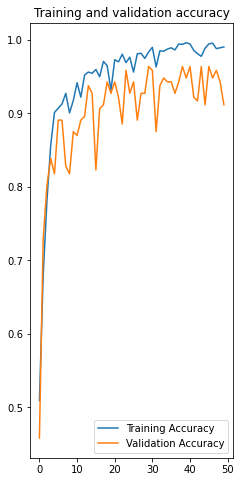

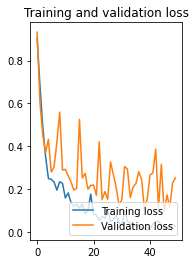

In [210]:
EPOCHS=50
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and validation accuracy")
plt.show()

plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label="Training loss")
plt.plot(range(EPOCHS), val_loss, label="Validation loss")
plt.legend(loc="lower right")
plt.title("Training and validation loss")
plt.show()



first image to predict
actual label: Potato___healthy
1/1 [==============================] - 0s 263ms/step
1


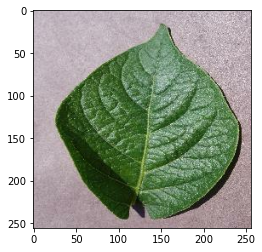

In [215]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image=images_batch[0].numpy().astype("uint8")
    first_label=labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print(np.argmax(batch_prediction[0]))

In [216]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])),2)
    return predicted_class, confidence


1/1 [==============================] - 0s 33ms/step


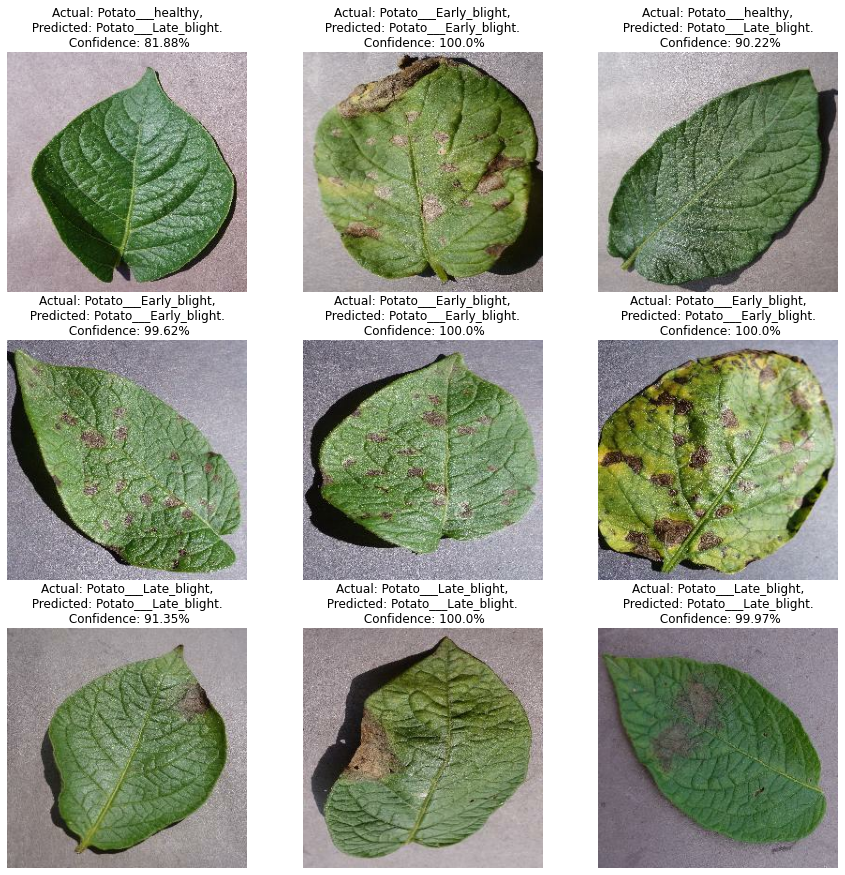

In [217]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}. \n Confidence: {confidence}%")
        
        
        plt.axis("off")
        

In [226]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
